In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the data, and separate the target
iowa_file_path = 'train.csv'
home_data = pd.read_csv(iowa_file_path)
y = home_data.SalePrice
home_data.drop(['SalePrice'], axis = 1, inplace = True)

X = home_data.select_dtypes(exclude=['object'])

missing_cols = [col for col in X.columns if X[col].isnull().any()]

X = X.drop(missing_cols, axis = 1)

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_val_mae))

Validation MAE for Random Forest Model: 17,006


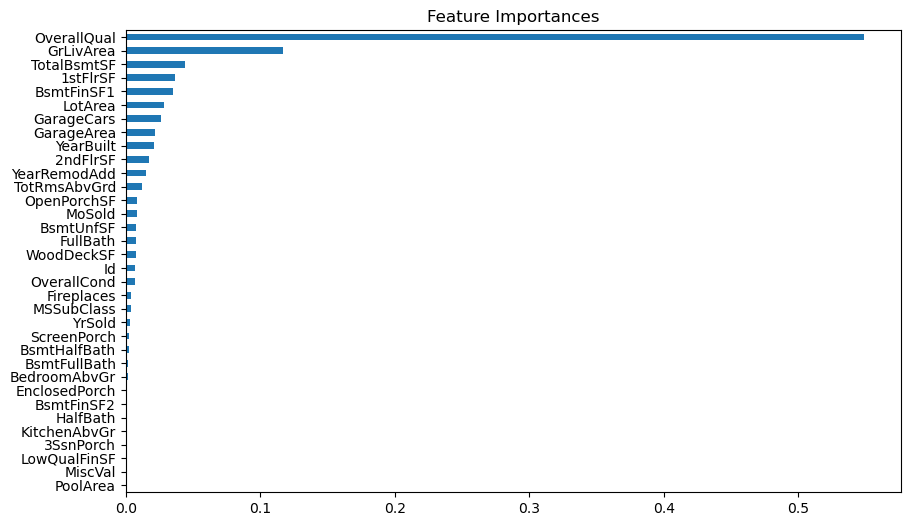

In [8]:
importances = rf_model.feature_importances_
feature_names = train_X.columns

feat_importances = pd.Series(importances, index=feature_names)
feat_importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title("Feature Importances")
plt.show()

In [10]:
train_X.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [12]:
# Hyperparameter grid search
esti = [25, 50, 100, 150, 200]
depth = [15, 18, 20, 25, 30]
featrue = [2, 3, 4, 5, 6]
samples = [2, 3, 4, 5, 6]

result = []

for i in range(5):   
    for j in range(5):
        for k in range(5):
            for l in range(5):
                rf_model_on_full_data = RandomForestRegressor(
                    n_estimators = esti[i],
                    max_depth = depth[j],
                    max_features = featrue[k],
                    min_samples_split = samples[l],
                    random_state=1)
                
                rf_model_on_full_data.fit(train_X, train_y)
                pred = rf_model_on_full_data.predict(val_X)
                mae = mean_absolute_error(pred, val_y)

                result.append({
                    "n_estimators" : esti[i],
                    "max_depth" : depth[j],
                    "max_features" : featrue[k],
                    "min_samples_split" : samples[l],
                    "mae" : mae
                })

In [14]:
result_frame = pd.DataFrame(result)
sort_result_frame = result_frame.sort_values(by = "mae")
sort_result_frame.mae = sort_result_frame["mae"].astype(float).round(0)
sort_result_frame

,n_estimators,max_depth,max_features,min_samples_split,mae
447,150,20,6,4,16613.0
470,150,25,6,2,16708.0
345,100,25,6,2,16735.0
445,150,20,6,2,16737.0
322,100,20,6,4,16744.0
...,...,...,...,...,...
54,25,20,2,6,19562.0
52,25,20,2,4,19660.0
102,25,30,2,4,19894.0
77,25,25,2,4,19894.0


In [16]:
maee = sort_result_frame[sort_result_frame.mae < 18000.0]
maee

,n_estimators,max_depth,max_features,min_samples_split,mae
447,150,20,6,4,16613.0
470,150,25,6,2,16708.0
345,100,25,6,2,16735.0
445,150,20,6,2,16737.0
322,100,20,6,4,16744.0
...,...,...,...,...,...
257,100,15,3,4,17974.0
156,50,18,3,3,17976.0
150,50,18,2,2,17992.0
123,25,30,6,5,17996.0


<Axes: xlabel='n_estimators', ylabel='mae'>

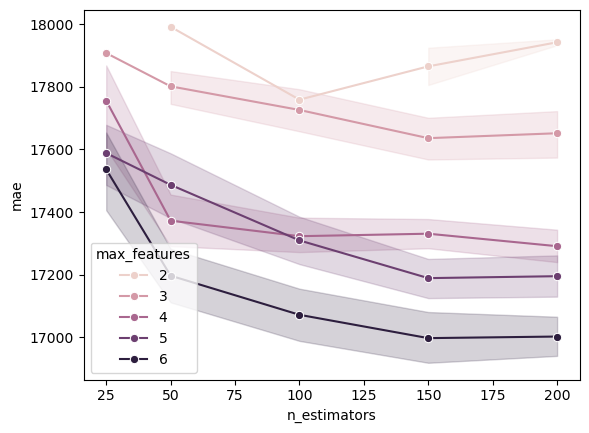

In [18]:
sns.lineplot(x='n_estimators', y='mae', hue='max_features', data=maee, marker="o")

<Axes: xlabel='n_estimators', ylabel='mae'>

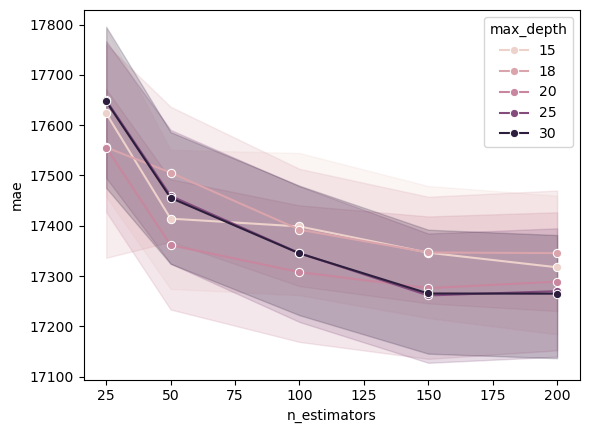

In [20]:
sns.lineplot(x='n_estimators', y='mae', hue='max_depth', data=maee, marker="o")

<Axes: xlabel='n_estimators', ylabel='mae'>

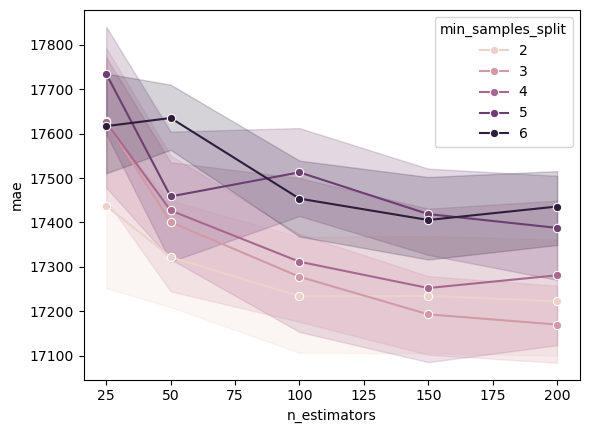

In [22]:
sns.lineplot(x='n_estimators', y='mae', hue='min_samples_split', data=maee, marker="o")

<Axes: xlabel='max_depth', ylabel='mae'>

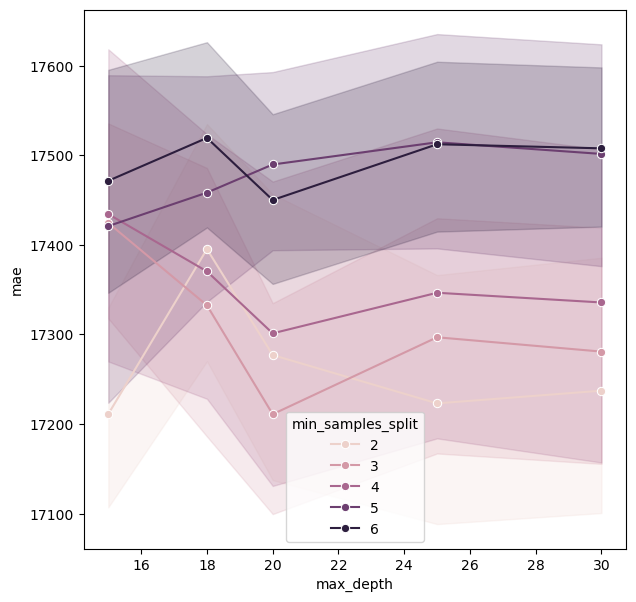

In [24]:
plt.figure(figsize = (7,7))
sns.lineplot(x='max_depth', y='mae', hue='min_samples_split', data=maee, marker="o")

In [30]:
esti = [75, 100, 125, 150, 175, 200]
depth = [20, 25, 30]
featrue = [5, 10, 15, 20, 25, 30]
samples = [2, 3, 4]
result_2 = []
for i in range(len(esti)):   
    for j in range(len(depth)):
        for k in range(len(featrue)):
            for l in range(len(samples)):
                rf_model_on_full_data = RandomForestRegressor(
                    
                    n_estimators = esti[i],
                    max_depth = depth[j],
                    max_features = featrue[k],
                    min_samples_split = samples[l],
                    random_state=1)
                
                rf_model_on_full_data.fit(train_X, train_y)
                pred = rf_model_on_full_data.predict(val_X)
                mae = mean_absolute_error(pred, val_y)
                result_2.append({
                    "n_estimators" : esti[i],
                    "max_depth" : depth[j],
                    "max_features" : featrue[k],
                    "min_samples_split" : samples[l],
                    "mae" : mae
                })
            

In [32]:
result_frame_2 = pd.DataFrame(result_2)
sort_result_frame_2 = result_frame_2.sort_values(by = "mae")
sort_result_frame_2.head()

,n_estimators,max_depth,max_features,min_samples_split,mae
222,175,20,15,2,16268.765689
132,125,25,15,2,16279.436196
114,125,20,15,2,16281.940197
186,150,25,15,2,16290.992538
60,100,20,15,2,16292.963923


In [28]:
result_frame_2 = pd.DataFrame(result_2)
sort_result_frame_2 = result_frame_2.sort_values(by = "mae")
sort_result_frame_2.head()

,n_estimators,max_depth,max_features,min_samples_split,mae
183,125,19,10,2,16247.378765
75,100,19,10,2,16249.624532
291,150,19,10,2,16262.648528
420,175,20,15,2,16268.765689
204,125,20,15,2,16281.940197
